In [16]:
import pandas as pd


sentiment=pd.read_csv(r'C:\Users\Lenovo\Downloads\fear_greed_index.csv')

trades= pd.read_csv(r'C:\Users\Lenovo\Downloads\historical_data.csv')




In [19]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [18]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [20]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [21]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [32]:

sentiment.columns = sentiment.columns.str.lower().str.replace(' ', '_')


In [33]:

sentiment.columns


Index(['timestamp', 'value', 'classification', 'date', 'date'], dtype='object')

In [34]:
trades.columns = trades.columns.str.lower().str.replace(' ', '_')

In [35]:
trades.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')

In [36]:
trades['timestamp_ist'] = pd.to_datetime(trades['timestamp_ist'], errors='coerce')


In [39]:
sentiment.columns


Index(['timestamp', 'value', 'classification', 'date', 'date'], dtype='object')

In [40]:
sentiment = sentiment.loc[:, ~sentiment.columns.duplicated()]


In [41]:
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')


<ipython-input-41-f09f548f6ed7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')


In [42]:
sentiment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [43]:
sentiment['classification'].unique()


array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

In [44]:
sentiment['sentiment_type'] = sentiment['classification'].replace({
    'Extreme Fear': 'Fear',
    'Fear': 'Fear',
    'Greed': 'Greed',
    'Extreme Greed': 'Greed'
})


In [45]:
sentiment['sentiment_type'].value_counts()


sentiment_type
Fear       1289
Greed       959
Neutral     396
Name: count, dtype: int64

In [46]:
trades = trades.drop(columns=[
    'transaction_hash',
    'order_id',
    'trade_id',
    'timestamp'
])


In [47]:
trades = trades.rename(columns={
    'closed_pnl': 'pnl',
    'execution_price': 'price',
    'size_usd': 'size_usd'
})


In [48]:
print(trades.isnull().sum())



account                0
coin                   0
price                  0
size_tokens            0
size_usd               0
side                   0
timestamp_ist     131999
start_position         0
direction              0
pnl                    0
crossed                0
fee                    0
dtype: int64
timestamp         0
value             0
classification    0
date              0
sentiment_type    0
dtype: int64


In [ ]:
trades = trades.dropna(subset=['timestamp_ist'])


In [51]:
print(trades.isnull().sum())


account           0
coin              0
price             0
size_tokens       0
size_usd          0
side              0
timestamp_ist     0
start_position    0
direction         0
pnl               0
crossed           0
fee               0
dtype: int64


In [49]:
print(sentiment.isnull().sum())

timestamp         0
value             0
classification    0
date              0
sentiment_type    0
dtype: int64


In [53]:
trades['date'] = trades['timestamp_ist'].dt.date


In [54]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date


In [55]:
merged_df = trades.merge(
    sentiment[['date', 'sentiment_type']],
    on='date',
    how='inner'
)


In [56]:
print(merged_df.shape)
merged_df[['date', 'sentiment_type', 'pnl']].head()


(35864, 14)


,date,sentiment_type,pnl
0,2024-02-12,Greed,0.0
1,2024-02-12,Greed,0.0
2,2024-02-12,Greed,0.0
3,2024-02-12,Greed,0.0
4,2024-02-12,Greed,0.0


In [58]:
merged_df.groupby('sentiment_type')['pnl'].mean()


sentiment_type
Fear       110.134333
Greed      104.447834
Neutral     27.088803
Name: pnl, dtype: float64

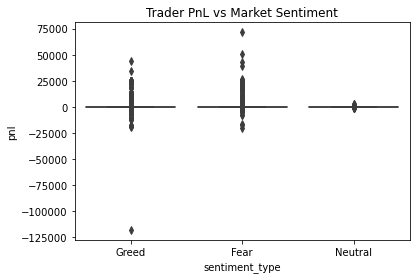

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='sentiment_type', y='pnl', data=merged_df)
plt.title("Trader PnL vs Market Sentiment")
plt.show()


In [63]:
merged_df['win'] = merged_df['pnl'] > 0
merged_df.groupby('sentiment_type')['win'].mean()


sentiment_type
Fear       0.369003
Greed      0.474783
Neutral    0.494920
Name: win, dtype: float64

In [64]:
merged_df.groupby('sentiment_type')['size_usd'].mean()


sentiment_type
Fear       5511.246132
Greed      4450.397683
Neutral    4332.202906
Name: size_usd, dtype: float64

In [65]:
pd.crosstab(
    merged_df['sentiment_type'],
    merged_df['direction'],
    normalize='index'
)


direction,Buy,Close Long,Close Short,Long > Short,Open Long,Open Short,Sell,Short > Long,Spot Dust Conversion
sentiment_type,,,,,,,,,
Fear,0.066687,0.207780,0.176474,0.000309,0.279839,0.217228,0.050262,0.000309,0.001111
Greed,0.117247,0.193756,0.159818,0.000769,0.140070,0.194407,0.192101,0.000769,0.001064
Neutral,0.136792,0.165094,0.137881,0.000000,0.095428,0.160015,0.303338,0.000000,0.001451


In [67]:
plt.savefig("pnl_vs_sentiment.png", dpi=300, bbox_inches="tight")


<Figure size 432x288 with 0 Axes>